### Decision Tree

A decision tree is one of the popular and powerful machine learning algorithms. It is a non-parametric supervised learning method that can be used for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. Decision trees are assigned to the information based learning algorithms which use different measures of information gain for learning. We can use decision trees for issues where we have continuous but also categorical input and target features. The main idea of decision trees is to find those descriptive features which contain the most "information" regarding the target feature and then split the dataset along the values of these features such that the target feature values for the resulting sub_datasets are as pure as possible.<br>
The descriptive feature which leaves the target feature most purely is said to be the most informative one. This process of finding the "most informative" feature is done until we accomplish a stopping criteria where we then finally end up in so called leaf nodes. The leaf nodes contain the predictions we will make for new query instances presented to our trained model. A decision tree mainly consists of  decision nodes and leaf nodes which are then connected by branches.

![decision_tree](images/decision_tree.png)

### How does the Decision Tree algorithm work?

The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using a Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until we reach the stopping criteria:
     * All the tuples belong to the same attribute value.
     * There are no more remaining attributes.
     * There are no more instances.

### Attribute Selection Measures

Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute. Most popular selection measures are Information Gain, Gain Ratio, and Gini Index.

### 1. Information Gain (Entropy)<br>
Here, we try to find out attribute that returns the highest information gain and the smallest entropy.

$$Information\ Gain = Entropy(before) - \sum_{j=1}^k Entropy(j,after)$$
Where “before” is the dataset before the split, K is the number of subsets generated by the split, and (j, after) is subset j after the split.

$$ Entropy(S) = \sum_{i=1}^c-p_i\log_2p_i$$
### 2. Gini index
Gini index is calculated by subtracting the sum of the squared probabilities of each class from one. It favors larger partitions and easy to implement whereas information gain favors smaller partitions with distinct values.

$$Gini = 1 - \sum_{i=1}^c (p_i)^2$$

Gini Index works with the categorical target variable “Success” or “Failure”. It performs only Binary splits.

### 3. Gain Ratio
Information gain is biased towards choosing attributes with a large number of values as root nodes. It means it prefers the attribute with a large number of distinct values. It penalize a variable with more distinct values which will help us decide the split at the next level.

![gain_ratio](images/gain_ratio.png)

Where “before” is the dataset before the split, K is the number of subsets generated by the split, and (j, after) is subset j after the split.

### 4. Reduction in Variance
Reduction in variance is an algorithm used for continuous target variables (regression problems). This algorithm uses the standard formula of variance to choose the best split. The split with lower variance is selected as the criteria to split the population

$$ Variance = \frac{\sum(X-\bar X)^2}{n}$$

Above X-bar is the mean of the values, X is actual and n is the number of values.

### 5. Chi-Square
The acronym CHAID stands for Chi-squared Automatic Interaction Detector. It is one of the oldest tree classification methods. It finds out the statistical significance between the differences between sub-nodes and parent node. We measure it by the sum of squares of standardized differences between observed and expected frequencies of the target variable. Higher the value of Chi-Square higher the statistical significance of differences between sub-node and Parent node. Mathematically, Chi-squared is represented as:


![chi_square](images/chi_square.jpg)

#### The most notable types of decision tree algorithms are:-

1. **Iterative Dichotomiser 3 (ID3)** : This algorithm uses Information Gain to decide which attribute is to be used classify the current subset of the data. For each level of the tree, information gain is calculated for the remaining data recursively.

2. **C4.5** : This algorithm is the successor of the ID3 algorithm. This algorithm uses either Information gain or Gain ratio to decide upon the classifying attribute. It is a direct improvement from the ID3 algorithm as it can handle both continuous and missing attribute values.

3. **Classification and Regression Tree (CART)** : It is a dynamic learning algorithm which can produce a regression tree as well as a classification tree depending upon the dependent variable. CART alogorithm in sklearn by default uses Gini index method to create split points.

### Classification and Regression Tree (CART)

In [30]:
import pandas as pd

data = pd.DataFrame({"toothed":["True","True","True","False","True","True","True","True","True","False"],
                     "breathes":["True","True","True","True","True","True","False","True","True","True"],
                     "legs":["True","True","False","True","True","True","False","False","True","True"],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    columns=["toothed","breathes","legs","species"])

features = data[["toothed","breathes","legs"]]
target = data["species"]

data

,toothed,breathes,legs,species
0,True,True,True,Mammal
1,True,True,True,Mammal
2,True,True,False,Reptile
3,False,True,True,Mammal
4,True,True,True,Mammal
5,True,True,True,Mammal
6,True,False,False,Reptile
7,True,True,False,Reptile
8,True,True,True,Mammal
9,False,True,True,Reptile


![decision_split](images/decision_split1.png)

**Entropy** of our dataset regarding the target feature is calculated as:<br><br>
Mammal - 6, Reptile - 4, Total - 10
$$Entropy(D) = H(D)=−\left[(\frac{6}{10}∗log_2(\frac{6}{10}))+(\frac{4}{10}∗log_2(\frac{4}{10}))\right]= -[-0.442 - 0.5288] = 0.971$$

![decision_split2](images/decision_split2.png)
![decision_split3](images/decision_split3.png)
![decision_split4](images/decision_split4.png)

We see that for **legs == False**, the target feature values of the remaining dataset are all Reptile and hence we set this as leaf node because we have a pure dataset.

Until now we have found the feature for the root node as well as a leaf node for **legs == False**. The same steps for information gain calculation must now be accomplished also for the remaining dataset for **legs == True** since here we still have a mixture of different target feature values. Hence:

![decision_split5](images/decision_split5.png)

#### Hence the completely grown tree looks like:

![decision_split6](images/decision_split6.png)

Mind the last split (node) where the dataset got split on the breathes feature. Here the breathes feature solely contains data where breaths == True. Hence for breathes == False there are no instances in the dataset and therewith there is no sub-Dataset which can be built. In that case we return the most frequently occurring target feature value in the original dataset which is Mammal. This is an example how our tree model generalizes behind the training data.
If we consider the other branch, that is breathes == True we know, that after splitting the Dataset on the values of a specific feature (breathes {True,False}) in our case, the feature must be removed. Well, that leads to a dataset where no more features are available to further split the dataset on. Hence we stop growing the tree and return the mode value of the direct parent node which is "Mammal".

### Important Terminology related to Decision Trees
1. **Root Node**: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.
<br><br>
2. **Splitting**: It is a process of dividing a node into two or more sub-nodes.<br><br>
3. **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.<br><br>
4. **Leaf / Terminal Node**: Nodes do not split is called Leaf or Terminal node.<br><br>
5. **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.<br><br>
6. **Branch / Sub-Tree**: A subsection of the entire tree is called branch or sub-tree.<br><br>
7. **Parent and Child Node**: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

![decision_tree2](images/decision_tree2.png)

### Implementation using sklearn

In [31]:
data.head(3)

,toothed,breathes,legs,species
0,True,True,True,Mammal
1,True,True,True,Mammal
2,True,True,False,Reptile


In [33]:
train_df = data.replace({'True':1,'False':0,'Mammal':1,'Reptile':0})

In [35]:
X_train = train_df[['toothed','breathes','legs']]
y_train = train_df['species']

In [36]:
#importing decision tree classifier from sklearn

from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier uses CART alogortihm underneath

In [37]:
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [38]:
predictions = dtree.predict(X_train)
predictions

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

To use plot_tree scikit-learn need to be updated to latest version (>0.21) <br>
* To check the scikit-learn version : **!python -m pip show scikit-learn**<br>
* To update for the latest version : **!pip install -U scikit-learn --user**

In [25]:
#!python -m pip show scikit-learn

In [26]:
#!pip install -U scikit-learn --user

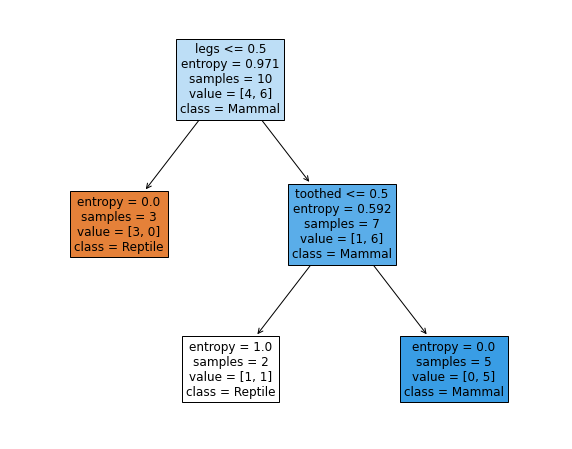

In [39]:
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
a = plot_tree(dtree, feature_names=X_train.columns, fontsize=12, filled=True, 
              class_names=['Reptile', 'Mammal'])

### Decision Tree Hyper Parameters

The main parameters of the sklearn.tree.DecisionTreeClassifier class are:

* **criterion** - The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain
* **max_depth** – Maximum depth of the tree<br>
* **min_samples_leaf** – Minimum number of samples in a leaf. This parameter prevents creating trees where any leaf would have only a few members
* **min_samples_split** - Minimum number of samples required to split an internal node
* **max_leaf_nodes** - Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes

### Implementing Decision Tree on Titanic dataset

In [40]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv("titanic_processed.csv")

### Preparing data for sklearn

In [68]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_members_1,family_members_2,family_members_>=3
0,0,22.0,7.2500,0,1,1,0,1,1,0,0
1,1,38.0,65.6344,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,1,0,0,1,0,0,0
3,1,35.0,53.1000,0,0,0,0,1,1,0,0
4,0,35.0,8.0500,0,1,1,0,1,0,0,0


In [42]:
train_col = ['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male','Embarked_Q', 'Embarked_S', 'family_members_1', 
             'family_members_2','family_members_>=3']
target_col = 'Survived'

In [43]:
X = df[train_col]
y = df[target_col]

In [44]:
X.shape, y.shape

((891, 10), (891,))

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)                                            

In [47]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 10), (268, 10), (623,), (268,))

### Creating Decision Tree classifier 

In [48]:
#importing decision tree classifier from sklearn

from sklearn.tree import DecisionTreeClassifier

In [49]:
# Defining the classifier and its parameters
clf_tree = DecisionTreeClassifier()

# Fitting the classifier over training data
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
clf_tree.get_depth()

19

In [51]:
# Predicting on the train dataset
y_pred_train = clf_tree.predict(X_train)
y_pred_train_prob = clf_tree.predict_proba(X_train)[:, 1]

In [52]:
# Predicting on the test dataset
y_pred = clf_tree.predict(X_test)
y_pred_prob = clf_tree.predict_proba(X_test)[:, 1]

In [53]:
from sklearn import metrics

In [54]:
# Custom function to Evaluate Model performance
def model_evaluation(y_true, y_prob, threshold = 0.5):
    y_pred = (y_prob>=threshold).astype(int)
    print("Accuracy: ", round(metrics.accuracy_score(y_true, y_pred)*100,2), "%")
    print("Recall: ", round(metrics.recall_score(y_true, y_pred)*100,2), "%")
    print("Precision: ", round(metrics.precision_score(y_true, y_pred)*100,2), "%")
    print("F1-score: ", round(metrics.f1_score(y_true, y_pred)*100,2), "%")

In [55]:
# Model evaluation on training dataset

model_evaluation(y_train, y_pred_train_prob)

Accuracy:  97.75 %
Recall:  98.7 %
Precision:  95.4 %
F1-score:  97.02 %


In [56]:
# Model evaluation on testing dataset

model_evaluation(y_test, y_pred_prob)

Accuracy:  72.76 %
Recall:  70.27 %
Precision:  66.1 %
F1-score:  68.12 %


In [67]:
# Overfitting

### Fitting a model with stopping criteria defined

In [57]:
# Defining the classifier and its parameters
clf_tree = DecisionTreeClassifier(max_depth = 4)

# Fitting the classifier over training data
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [58]:
clf_tree.get_depth()

4

In [59]:
# Predicting on the train dataset
y_pred_train = clf_tree.predict(X_train)
y_pred_train_prob = clf_tree.predict_proba(X_train)[:, 1]

In [60]:
# Predicting on the test dataset
y_pred = clf_tree.predict(X_test)
y_pred_prob = clf_tree.predict_proba(X_test)[:, 1]

In [61]:
# Model evaluation on training dataset

model_evaluation(y_train, y_pred_train_prob)

Accuracy:  84.43 %
Recall:  75.32 %
Precision:  81.31 %
F1-score:  78.2 %


In [62]:
# Model evaluation on testing dataset

model_evaluation(y_test, y_pred_prob)

Accuracy:  82.84 %
Recall:  72.07 %
Precision:  84.21 %
F1-score:  77.67 %


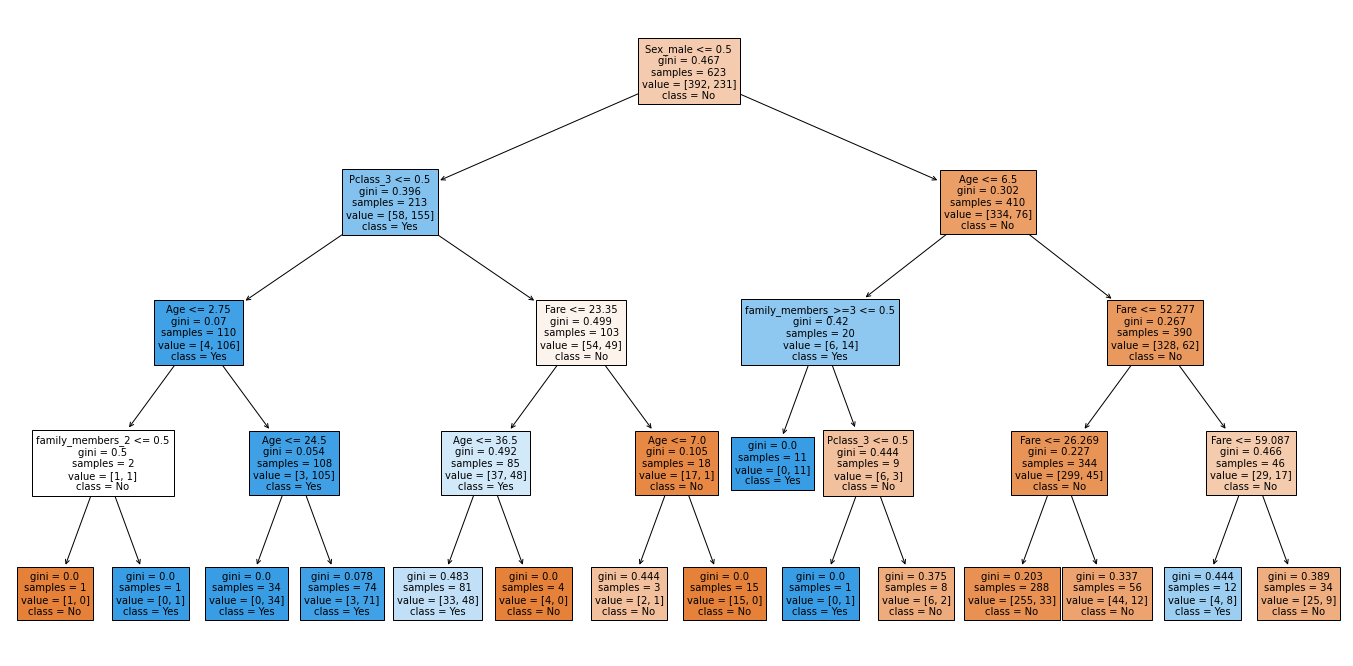

In [63]:
# Visualizing the best fit tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(24,12))
a = plot_tree(clf_tree, feature_names=X_train.columns, fontsize=10, filled=True, 
              class_names=['No', 'Yes'])

### Variable/feature Importance

In [65]:
# Calculate feature importances

clf_tree.feature_importances_

array([0.10521182, 0.1107271 , 0.        , 0.18076649, 0.56621487,
       0.        , 0.        , 0.        , 0.00686662, 0.03021311])

In [66]:
# Calculate feature importances
importances = clf_tree.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

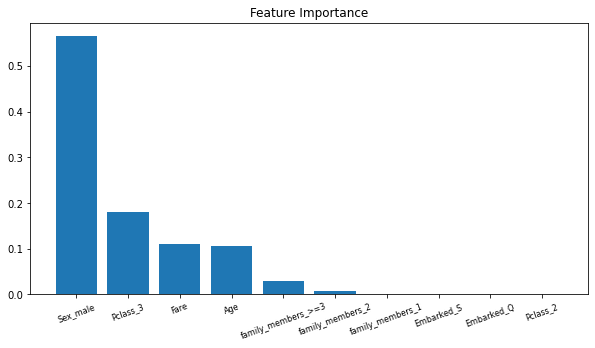

In [67]:
import matplotlib.pyplot as plt

# Barplot: Add bars
plt.figure(figsize = (10,5))
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=20, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

### Advantages of decision trees

* Easy to understand as it is intuitive.
* Easy to explain and visualize as it results in a set of rules.
* Open to both numerical and categorical data
* Perform quite well on large datasets
* Work at the speed of light compared to KNN and other classification algorithms.

### Limits of decision tree

Decision trees are simple but can be inaccurate. One misstep in the choice of the next node can drive you to a completely different result. Also if the tree is deeper → the more specific it is to your dataset → higher is the risk of overfitting.

### Resources:
Decision Tree Algorithm — Explained: https://towardsdatascience.com/decision-tree-algorithm-explained-83beb6e78ef4 <br>
Decision Tree Classification in Python: https://www.datacamp.com/community/tutorials/decision-tree-classification-python